In [2]:
import numpy as np
import matplotlib.pylab as plt

In [8]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad

In [9]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

In [10]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

In [11]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [57]:
init_x = np.array([-3.0, 4.0])    

In [58]:
lr = 0.1
step_num = 23
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

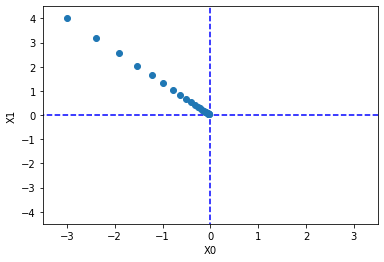

In [59]:
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [60]:
x

array([-0.01770887,  0.02361183])

In [61]:
x_history

array([[-3.        ,  4.        ],
       [-2.4       ,  3.2       ],
       [-1.92      ,  2.56      ],
       [-1.536     ,  2.048     ],
       [-1.2288    ,  1.6384    ],
       [-0.98304   ,  1.31072   ],
       [-0.786432  ,  1.048576  ],
       [-0.6291456 ,  0.8388608 ],
       [-0.50331648,  0.67108864],
       [-0.40265318,  0.53687091],
       [-0.32212255,  0.42949673],
       [-0.25769804,  0.34359738],
       [-0.20615843,  0.27487791],
       [-0.16492674,  0.21990233],
       [-0.1319414 ,  0.17592186],
       [-0.10555312,  0.14073749],
       [-0.08444249,  0.11258999],
       [-0.06755399,  0.09007199],
       [-0.0540432 ,  0.07205759],
       [-0.04323456,  0.05764608],
       [-0.03458765,  0.04611686],
       [-0.02767012,  0.03689349],
       [-0.02213609,  0.02951479]])